## <font color="brown">IMPORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd

### <font color="blue">SERIES IS 1D & DATAFRAME IS 2D
    
#### <font color="green">PROVED:--->
- IN SERIES WHEN WE FETCH SOME ITEM IN THAT TIME YOU GIVE ONLY ONE INFORMATION i.e. IS THE INDEX POSITION/NUMBER.
- IN DATAFRAME WHEN FETCH SOME ITEM IN THAT TIME YOU GIVE TWO INFORMATION i.e. IS THE INDEX POSITION/NUMBER & COLUMN NAME.

In [2]:
# can we have multiple index? Let's try

index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [7]:
a[("ece", 2021)] 

7

#### THE BIG PROBLEM:

In [8]:

# When we fetch information base on only one value in that time it give error.
# if we want to fetch "cse":

a["cse"]

KeyError: 'cse'

#### THE SOLUTION:

- Multiindex series(also known as Hierarchical Indexing)

- Multiple index levels within a single index

### <font color="orange"> HOW TO CREATE MULTI-INDEX OBJECT

#### <font color="dark green">1. pd.MultiIndex.from_tuples()

In [10]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [11]:
# It give how many indexes in this Multi-index
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [12]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [13]:
multiindex.levels[1]

Int64Index([2019, 2020, 2021, 2022], dtype='int64')

#### <font color="dark green">2. pd.MultiIndex.from_product()

In [14]:
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

#### <font color="dark green"> creating a series with multiindex object

In [15]:
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [17]:
# IF YOU WANT "CSE" INDEX ITEMS.
# HOW TO FETCH ITEMS FROM SUCH A SERIES

s["cse"]

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [18]:
# IF YOU WANT THE VALUE OF "2019"

s["cse"][2019]

1

#### <font color="dark blue">UNSTACK
- IT CONVERT A MULTI-INDEX SERIES TO A DATAFRAME

In [22]:
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


#### <font color="dark blue">STACK
- IT CONVERT A DATAFRAME TO A MULTI-INDEX SERIES

In [24]:
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

### <FONT COLOR="dark red">PURPOSE OG MULTI-INDEX OBJECT
- IT CONVERT HIGHER DIMENSION DATA TO DATAFRAME / SERIES BY USING MULTI-INDEX OBJECT

## <font color="brown">MULTI-INDEX DATAFRAME

#### <font color="blue">MULITI-INDEXING IN ROWS

In [25]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [31]:
# HOW TO GET "CSE" ITEMS
branch_df1.loc["cse"]

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [32]:
# HOW TO GET "CSE" 2019 VALUE
branch_df1.loc["cse"].loc[2019]

avg_package    1
students       2
Name: 2019, dtype: int64

In [37]:
# Extract Both Column & Row
branch_df1.loc["cse","avg_package"]

2019    1
2020    3
2021    5
2022    7
Name: avg_package, dtype: int64

In [36]:
# Extract Both Column & Row & Values
branch_df1.loc["cse","avg_package"].loc[2019]

1

In [33]:
branch_df1.shape  

(8, 2)

#### <font color="dark blue"> Are columns really different from index?
- PANDAS DO NOT REPRESENT ROW & COLUMN DIFFERENT

#### <font color="blue">MULTI-INDEXING USING COLUMNS

In [50]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [42]:
# FETCHING DATA
branch_df2["delhi"]["avg_package"][2019]

1

In [48]:
branch_df2.loc[2019].loc["delhi"].loc["avg_package"]

1

In [49]:
branch_df2.shape

(4, 4)

#### <font color="blue">MULTI-INDEXING BOTH ROW & COLUMN

In [51]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [56]:
# FETCHING DATA
branch_df3.loc["cse"].loc[2019].loc["delhi"].loc["avg_package"]

1

In [59]:
branch_df3.shape

(8, 4)

### <font color="dark blue">STACKING
    - ROW TO COLUMN

In [68]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [61]:
branch_df3.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [64]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

### <font color="dark blue">UNSTACKING
    - COLUMN TO ROW

In [67]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [66]:
branch_df3.unstack().unstack()

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
 

### <font color="dark blue">WORKING WITH MULTI-INDEX DATAFRAME

#### <font color="dark green">HEAD

In [69]:
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

#### <font color="dark green">TAIL

In [70]:
branch_df3.tail()

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

#### <font color="dark green">INFO

In [71]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


#### <font color="dark green">DESCRIBE

In [72]:
branch_df3.describe()

delhi                 mumbai         
      avg_package   students avg_package students
count    8.000000   8.000000         8.0      8.0
mean     8.000000   9.000000         0.0      0.0
std      4.898979   4.898979         0.0      0.0
min      1.000000   2.000000         0.0      0.0
25%      4.500000   5.500000         0.0      0.0
50%      8.000000   9.000000         0.0      0.0
75%     11.500000  12.500000         0.0      0.0
max     15.000000  16.000000         0.0      0.0

#### <font color="dark green">DUPLICATE

In [73]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

#### <font color="dark green">ISNULL

In [74]:
branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

### <font color="dark blue">EXTRCATING ROWS & COLUMNS

#### <font color="grey">USING LOC

#### <font color="dark green">ONE ROW

In [75]:
branch_df3.loc[("cse",2019)]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: (cse, 2019), dtype: int64

#### <font color="dark green">MULTIPLE ROWS

In [77]:
branch_df3.loc[("cse",2019):("ece",2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

#### <font color="grey">USING ILOC

In [78]:
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

#### <font color="violet">EXTRACTING COLUMN

#### <font color="dark green">ONE COLUMN

In [86]:
branch_df3["delhi"]["students"]

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

#### <font color="dark green">MULTIPLE COLUMNS

In [82]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

#### <font color="dark green">BOTH ROWS & COLUMNS
#### <font color="GREY">USING FANCY INDEXING

In [83]:
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


#### <font color="dark BLUE">SORT INDEX
    BOTH--> DESCENDING---> DIFFERENT ORDER
    BASED ON ONE LEVEL

In [91]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [89]:
# Sorting based on Branch 
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [90]:
# Sorting based on Both Branch & Year
branch_df3.sort_index(ascending=[False,True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [92]:
# Year level Sorting
# Use Level Parameter
# Branch=0 , Year=1

branch_df3.sort_index(level=1,ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
cse 2022           7        8           0        0
ece 2021          13       14           0        0
cse 2021           5        6           0        0
ece 2020          11       12           0        0
cse 2020           3        4           0        0
ece 2019           9       10           0        0
cse 2019           1        2           0        0

#### <font color="dark green">TRANSPOSE
    Row Convert into Column & Column convert to Row

In [95]:
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

#### <font color="dark green">SWAPLEVEL
    Row Wise
    Column Wise

#### <font color="grey">Row Wise

In [96]:
# Convert the Branch to Year & Year to Branch
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

#### <font color="grey">Column Wise:

In [99]:
# Convert Upper Column Level to Lower Level & also Lower Level to Column Level
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### <font color="brown">LONG vs WIDE DATA
- WIDE FORMAT :  IT IS WHERE WE HAVE A SINGLE ROW FOR EVERY DATA POINT WITH MULTIPLE COLUMNS TO HOLD THE VALUES OF VARIOUS ATTRIBUTES.
- LONG FORMAT :  IT IS WHERE, FOR EACH DATA POINT WE HAVE AS MANY ROWS AS THE NUMBER OF ATTRIBUTES AND EACH ROW CONTAINS THE VALUES OG A PARTICULAR ATTRIBUTE FOR A GIVE DATA POINT.   

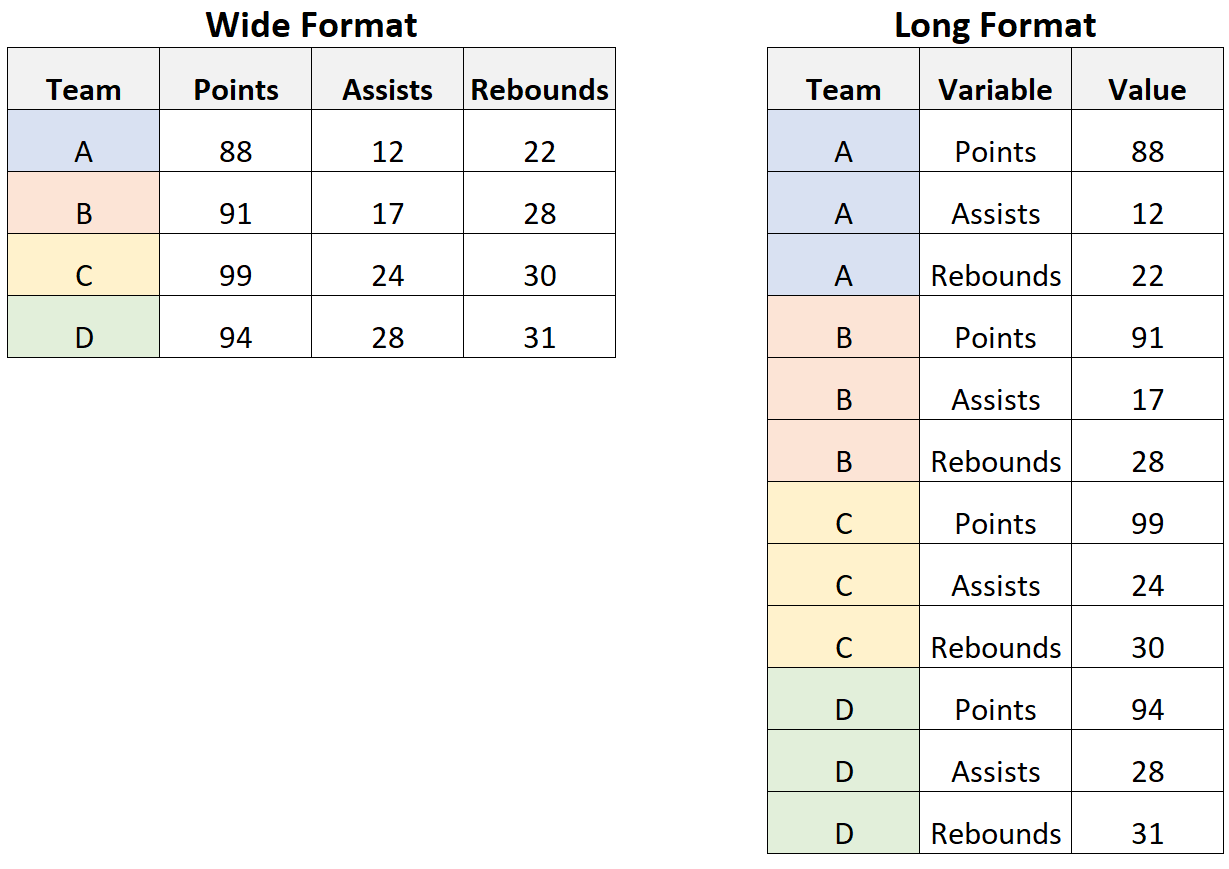

### <font color="dark orange">MELT
- Convert Wide Data Format to Long Data Format
- Columns to Rows

#### EG-1

In [100]:
pd.DataFrame({"Cse" : [120]})

,Cse
0,120


In [101]:
pd.DataFrame({"Cse" : [120]}).melt()

,variable,value
0,Cse,120


#### EG-2

In [102]:
pd.DataFrame({"Cse" : [120],"ece" : [140],"Mech" : [200]})

,Cse,ece,Mech
0,120,140,200


In [103]:
pd.DataFrame({"Cse" : [120],"ece" : [140],"Mech" : [200]}).melt()

,variable,value
0,Cse,120
1,ece,140
2,Mech,200


#### CHANGE THE COLUMN NAMES

In [104]:
pd.DataFrame({"Cse" : [120],"ece" : [140],"Mech" : [200]}).melt(var_name="branch",value_name="no. of stds")

,branch,no. of stds
0,Cse,120
1,ece,140
2,Mech,200


#### EG-3

In [105]:
pd.DataFrame({
    "branch" : ["mech","cse","ece"],
    "2020" : [120,125,160],
    "2021": [200,230,240],
    "2022" : [300,340,350]
})

,branch,2020,2021,2022
0,mech,120,200,300
1,cse,125,230,340
2,ece,160,240,350


In [130]:
# ID_VARS use to keep the branch column as it is & change other columns
dff=pd.DataFrame({
    "branch" : ["mech","cse","ece"],
    "2020" : [120,125,160],
    "2021": [200,230,240],
    "2022" : [300,340,350]
}).melt(id_vars="branch",var_name="year",value_name="stds")
dff

,branch,year,stds
0,mech,2020,120
1,cse,2020,125
2,ece,2020,160
3,mech,2021,200
4,cse,2021,230
5,ece,2021,240
6,mech,2022,300
7,cse,2022,340
8,ece,2022,350


In [112]:
td_df=pd.read_csv(r"C:\Users\mitra\Desktop\DUDUL DS\CAMPUSX\PYTHON\PANDAS\PANDAS MULTI-INDEXING\Datasets\time_series_covid19_deaths_global.csv")

In [113]:
td_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [127]:
tc_df=pd.read_csv(r"C:\Users\mitra\Desktop\DUDUL DS\CAMPUSX\PYTHON\PANDAS\PANDAS MULTI-INDEXING\Datasets\time_series_covid19_confirmed_global.csv")

In [128]:
tc_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


In [116]:
td_df.shape

(289, 1081)

In [118]:
td_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/24/22', '12/25/22', '12/26/22', '12/27/22', '12/28/22', '12/29/22',
       '12/30/22', '12/31/22', '1/1/23', '1/2/23'],
      dtype='object', length=1081)

In [122]:
deth=td_df.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="Death_count")
conf=tc_df.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="Cases_count")

In [123]:
deth

,Province/State,Country/Region,Lat,Long,Date,Death_count
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [124]:
conf

,Province/State,Country/Region,Lat,Long,Date,Cases_count
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [125]:
conf.merge(deth,on=["Province/State","Country/Region","Lat","Long","Date"])

,Province/State,Country/Region,Lat,Long,Date,Cases_count,Death_count
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [129]:
fin_res=conf.merge(deth,on=["Province/State","Country/Region","Lat","Long","Date"])[["Country/Region","Date","Cases_count","Death_count"]]
fin_res

,Country/Region,Date,Cases_count,Death_count
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### <font color="dark orange">PIVOT
- Convert Long Data Format to Wide Data Format
- Rows to Columns

In [131]:
dff

,branch,year,stds
0,mech,2020,120
1,cse,2020,125
2,ece,2020,160
3,mech,2021,200
4,cse,2021,230
5,ece,2021,240
6,mech,2022,300
7,cse,2022,340
8,ece,2022,350


In [137]:
dff.pivot(index=["branch"],columns="year",values="stds")

year,2020,2021,2022
branch,,,
cse,125,230,340
ece,160,240,350
mech,120,200,300


In [138]:
dff.pivot(index=["branch"],columns="year",values="stds").reset_index()

year,branch,2020,2021,2022
0,cse,125,230,340
1,ece,160,240,350
2,mech,120,200,300


In [143]:
dff.pivot(index=["branch"],columns="year",values="stds").fillna(' ').reset_index()

year,branch,2020,2021,2022
0,cse,125,230,340
1,ece,160,240,350
2,mech,120,200,300
